# Milestone 2 - Hypothesis Simulation 

## Author - Kenji Oman



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for **price and several other features.**
2. Compute **basic summary statistics by both classical, bootstrap and Bayesian methods**
3. Compute **confidence intervals** for the above summary statistics by classical, bootstrap and  Bayesian methods
4. Correctly **use hypothesis tests to determine if the differences in pairs and multiple populations are significant**:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model
            
Also from the assignment description:

**Your task is to impress the client with other revelations possibliy regarding insurance risk rating and losses compared to other cars.**

### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

--------------------
Pulled from the [UCI Machine Learning Repository website](https://archive.ics.uci.edu/ml/datasets/automobile), so we can get a better understanding of what we are looking at:

## Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. **The second rating corresponds to the degree to which the auto is more risky than its price indicates.** Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". **A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.**

**The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.**

Note: Several of the attributes in the database could be used as a "class" attribute.

## Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# Import, load data, and select features for futher consideration

In [ ]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"
# The server was down, so I pointed the notebook to a cached version of the dataset,
# but if the server is back up, can use the above
#fileName = "Automobile_price_data _Raw_.csv"

In [2]:
# Load necessary libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import preprocessing
#import scikits.bootstrap

from IPython.display import display, Markdown

/home/koman/miniconda3/envs/dsc/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# First, import the data
df = pd.read_csv(fileName, na_values='?')

# rename column names to replace '-' characters with '_'
# to make it easier to call the columns later
df.columns = [x.replace('-', '_') for x in df.columns]

display(df.head())

# Also, take a look at the dtypes
df.info()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

Last time (in assignment 4), we determined that `normalized_losses`, `num_of_doors`, `bore`, `stroke`, `horsepower`, `peak_rpm`, and `price` all contain NA values, with `normalized_losses` having the vast majority of the null values, with only 5 rows not having NA in `normalized_losses`, with NA in a different column.  As before, let's leave these rows, and just drop the NA values as needed.

Also from last time, we generated a `log_price` column, since this was more "normal" than the original price column, and used this for our comparisons/ tests.  Also, we compared how `log_price` correlated with `fuel_type`, `aspiration`, rear vs front-wheel drive, and `body_style`, so this time, we want to look at some other variables.  Also, the prompt recommends we take a look at insurance risk rating (`symboling` feature) and the losses compared to other cars (`normalized_losses` feature).  So, let's take a look the columns that are potential candidates for further consideration.

In [4]:
# First, let's add a log_price column, as something to compare with:
df['log_price'] = df.price.apply(np.log)

# Now, let's get a list of columns that aren't in the ones we have considered before,
# or price, since log_price is more normal.
candidate_cols = df.columns[~df.columns.isin(['fuel_type', 'aspiration', 'drive_wheels', 'body_style',
                                              'price'])]
print("Candidate Columns for futher consideration:\n", candidate_cols)

Candidate Columns for futher consideration:
 Index(['symboling', 'normalized_losses', 'make', 'num_of_doors',
       'engine_location', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'log_price'],
      dtype='object')


,symboling,normalized_losses,make,num_of_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,log_price
count,205.000000,164.000000,205,203,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,114,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,9.350115
std,1.245307,35.442168,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,0.502251
min,-2.000000,65.000000,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,8.540519
25%,0.000000,94.000000,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,8.958669
50%,1.000000,115.000000,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,9.239414
75%,2.000000,150.000000,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,9.711116


## Numerical Variables Scatter Matrix

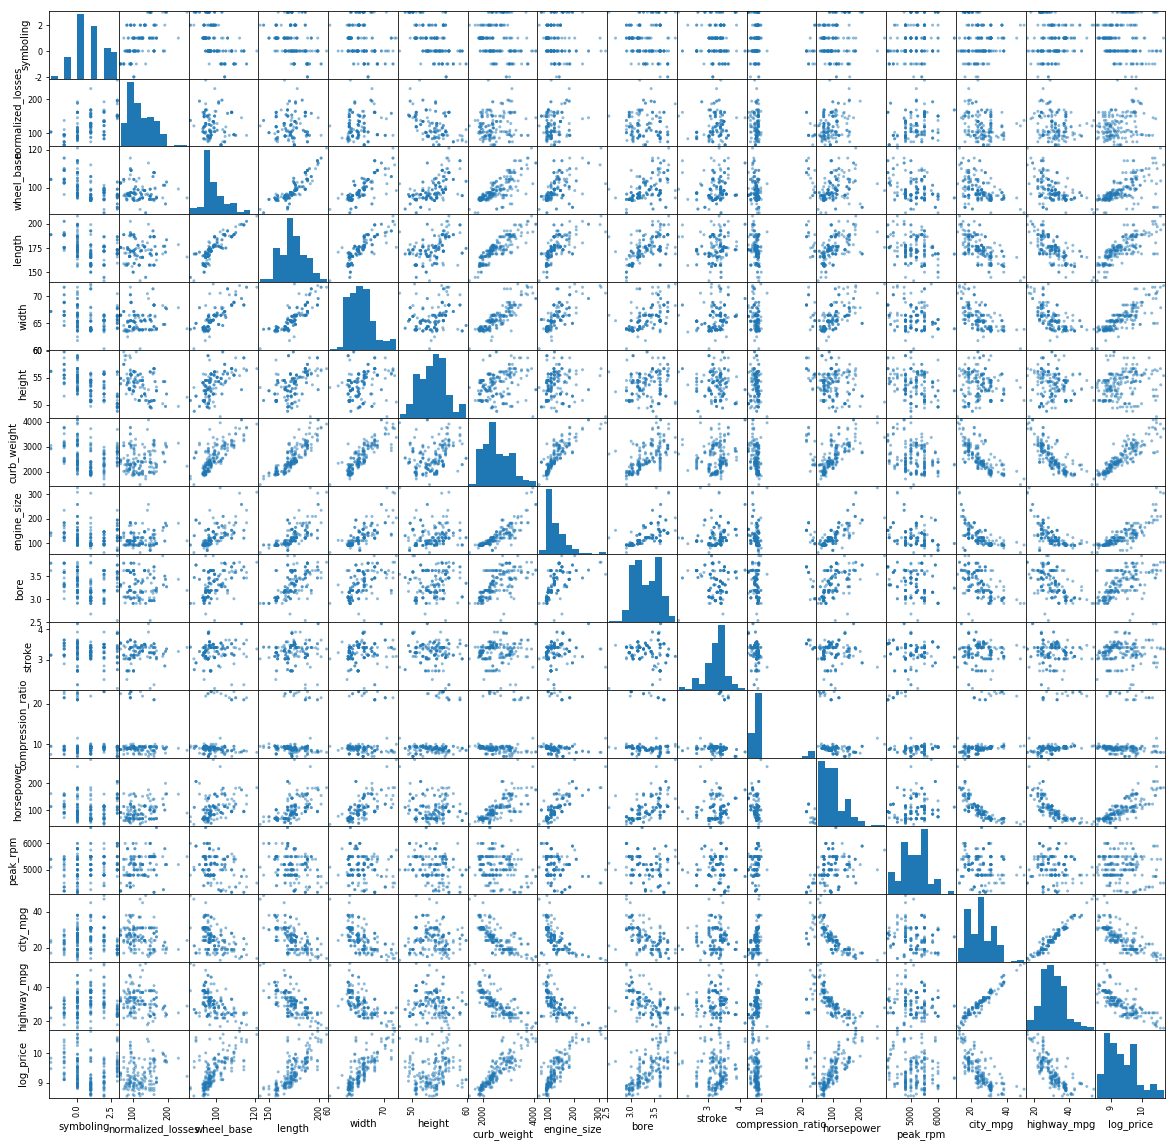

In [5]:
# Now, let's look at summary statistics of the available columns
with pd.option_context('max_columns', 1000):
    display(df[candidate_cols].describe(include='all'))
    
# Let's also do a scatter matrix of all the numerical columns
display(Markdown('## Numerical Variables Scatter Matrix'))
pd.plotting.scatter_matrix(df[candidate_cols], figsize=(20,20))
plt.show()

Wow, that's too many features to consider ...  So, let's cut them down a bit by picking symboling, normalized_losses, and log_price, and see which features correlate the most with these features.  Perhaps pick 3 additional features that correlate strongly whith these 3. As we did in Assignment 1, let's take a look at the absolute value of the correlation, so we look at _strength_ of correlation, and ignore the direction (ie, if things are anit-correlated).

<a id="clustered_cor_heatmap"></a>
## Clustered Correlation Heatmap

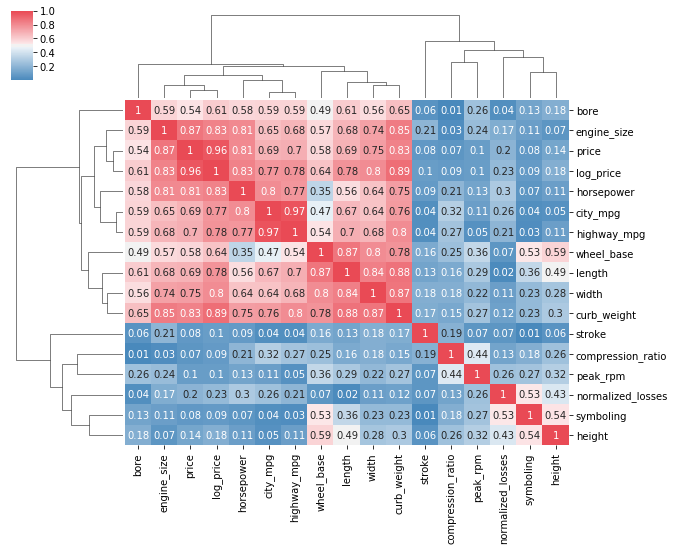

In [6]:
# Check the strength of correlation of various variables, clustered,
# to find those that might be the most interesting to further examine.
# Also, include all columns, just to make sure taking log of price doesn't
# mess up correlations with other variables (it doesn't but just wanted
# to confirm)
display(Markdown('<a id="clustered_cor_heatmap"></a>\n## Clustered Correlation Heatmap'))
cmap = sns.diverging_palette(242, 10, l=55, as_cmap=True)
sns.clustermap(df.corr().round(2).abs(), cmap=cmap, annot=True, figsize=(10,8))
plt.show()

From the above, it looks like log_price (and price too) are fairly well correlated with a group of the features, while symboling and normalized_losses aren't correlated with too much, but are mildly associated with each other, and also the height of the vehicle.

We also realize that the above doesn't take into acount the categorical variables, so let's try to see how these might impact log_price, normalized_losses, and symboling.

In [7]:
# First, grab the categorical variables
categorical_columns = df.dtypes[df.dtypes == 'object'].index.values

# We only want to continue to investigate those columns that we hadn't
# before
categorical_columns = [x for x in categorical_columns if x in candidate_cols]
print(categorical_columns, len(categorical_columns))

['make', 'num_of_doors', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system'] 6


In [8]:
# We have 6 categorical columns we can consider, let's look a little closer at the summary statistics of these
display(df[categorical_columns].describe())

# Let's also look at the value counts of each of the values in these columns
temp = pd.DataFrame()
# (sort the categorical columns by number of unique values, so we can have a
# nicer datatable at the end)
for cat in ['make', 'fuel_system', 'num_of_cylinders', 'engine_type', 'engine_location', 'num_of_doors']:
    temp2 = df[cat].value_counts(dropna=False).reset_index().rename(columns={'index': cat, cat: (cat + '_cnt')})
    temp = pd.merge(temp, temp2, left_index=True, right_index=True, how='outer')

temp

,make,num_of_doors,engine_location,engine_type,num_of_cylinders,fuel_system
count,205,203,205,205,205,205
unique,22,2,2,7,7,8
top,toyota,four,front,ohc,four,mpfi
freq,32,114,202,148,159,94


,make,make_cnt,fuel_system,fuel_system_cnt,num_of_cylinders,num_of_cylinders_cnt,engine_type,engine_type_cnt,engine_location,engine_location_cnt,num_of_doors,num_of_doors_cnt
0,toyota,32,mpfi,94.0,four,159.0,ohc,148.0,front,202.0,four,114.0
1,nissan,18,2bbl,66.0,six,24.0,ohcf,15.0,rear,3.0,two,89.0
2,mazda,17,idi,20.0,five,11.0,ohcv,13.0,NaN,NaN,NaN,2.0
3,mitsubishi,13,1bbl,11.0,eight,5.0,l,12.0,NaN,NaN,NaN,NaN
4,honda,13,spdi,9.0,two,4.0,dohc,12.0,NaN,NaN,NaN,NaN
5,subaru,12,4bbl,3.0,three,1.0,rotor,4.0,NaN,NaN,NaN,NaN
6,volkswagen,12,spfi,1.0,twelve,1.0,dohcv,1.0,NaN,NaN,NaN,NaN
7,peugot,11,mfi,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,volvo,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,dodge,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"make" has a bunch of different types (22 unique) which might be too many to consider for this assignment.  However, the remaining features have a reasonable number of values to be used (I do realize, however, that "make" might actually have really useful information if, for example, foreign cars carry higher risk, etc).  In any case, let's look at the distribution of each of these features with log_price, normalized_losses, and symboling.

## Categorical Variables' Boxplots

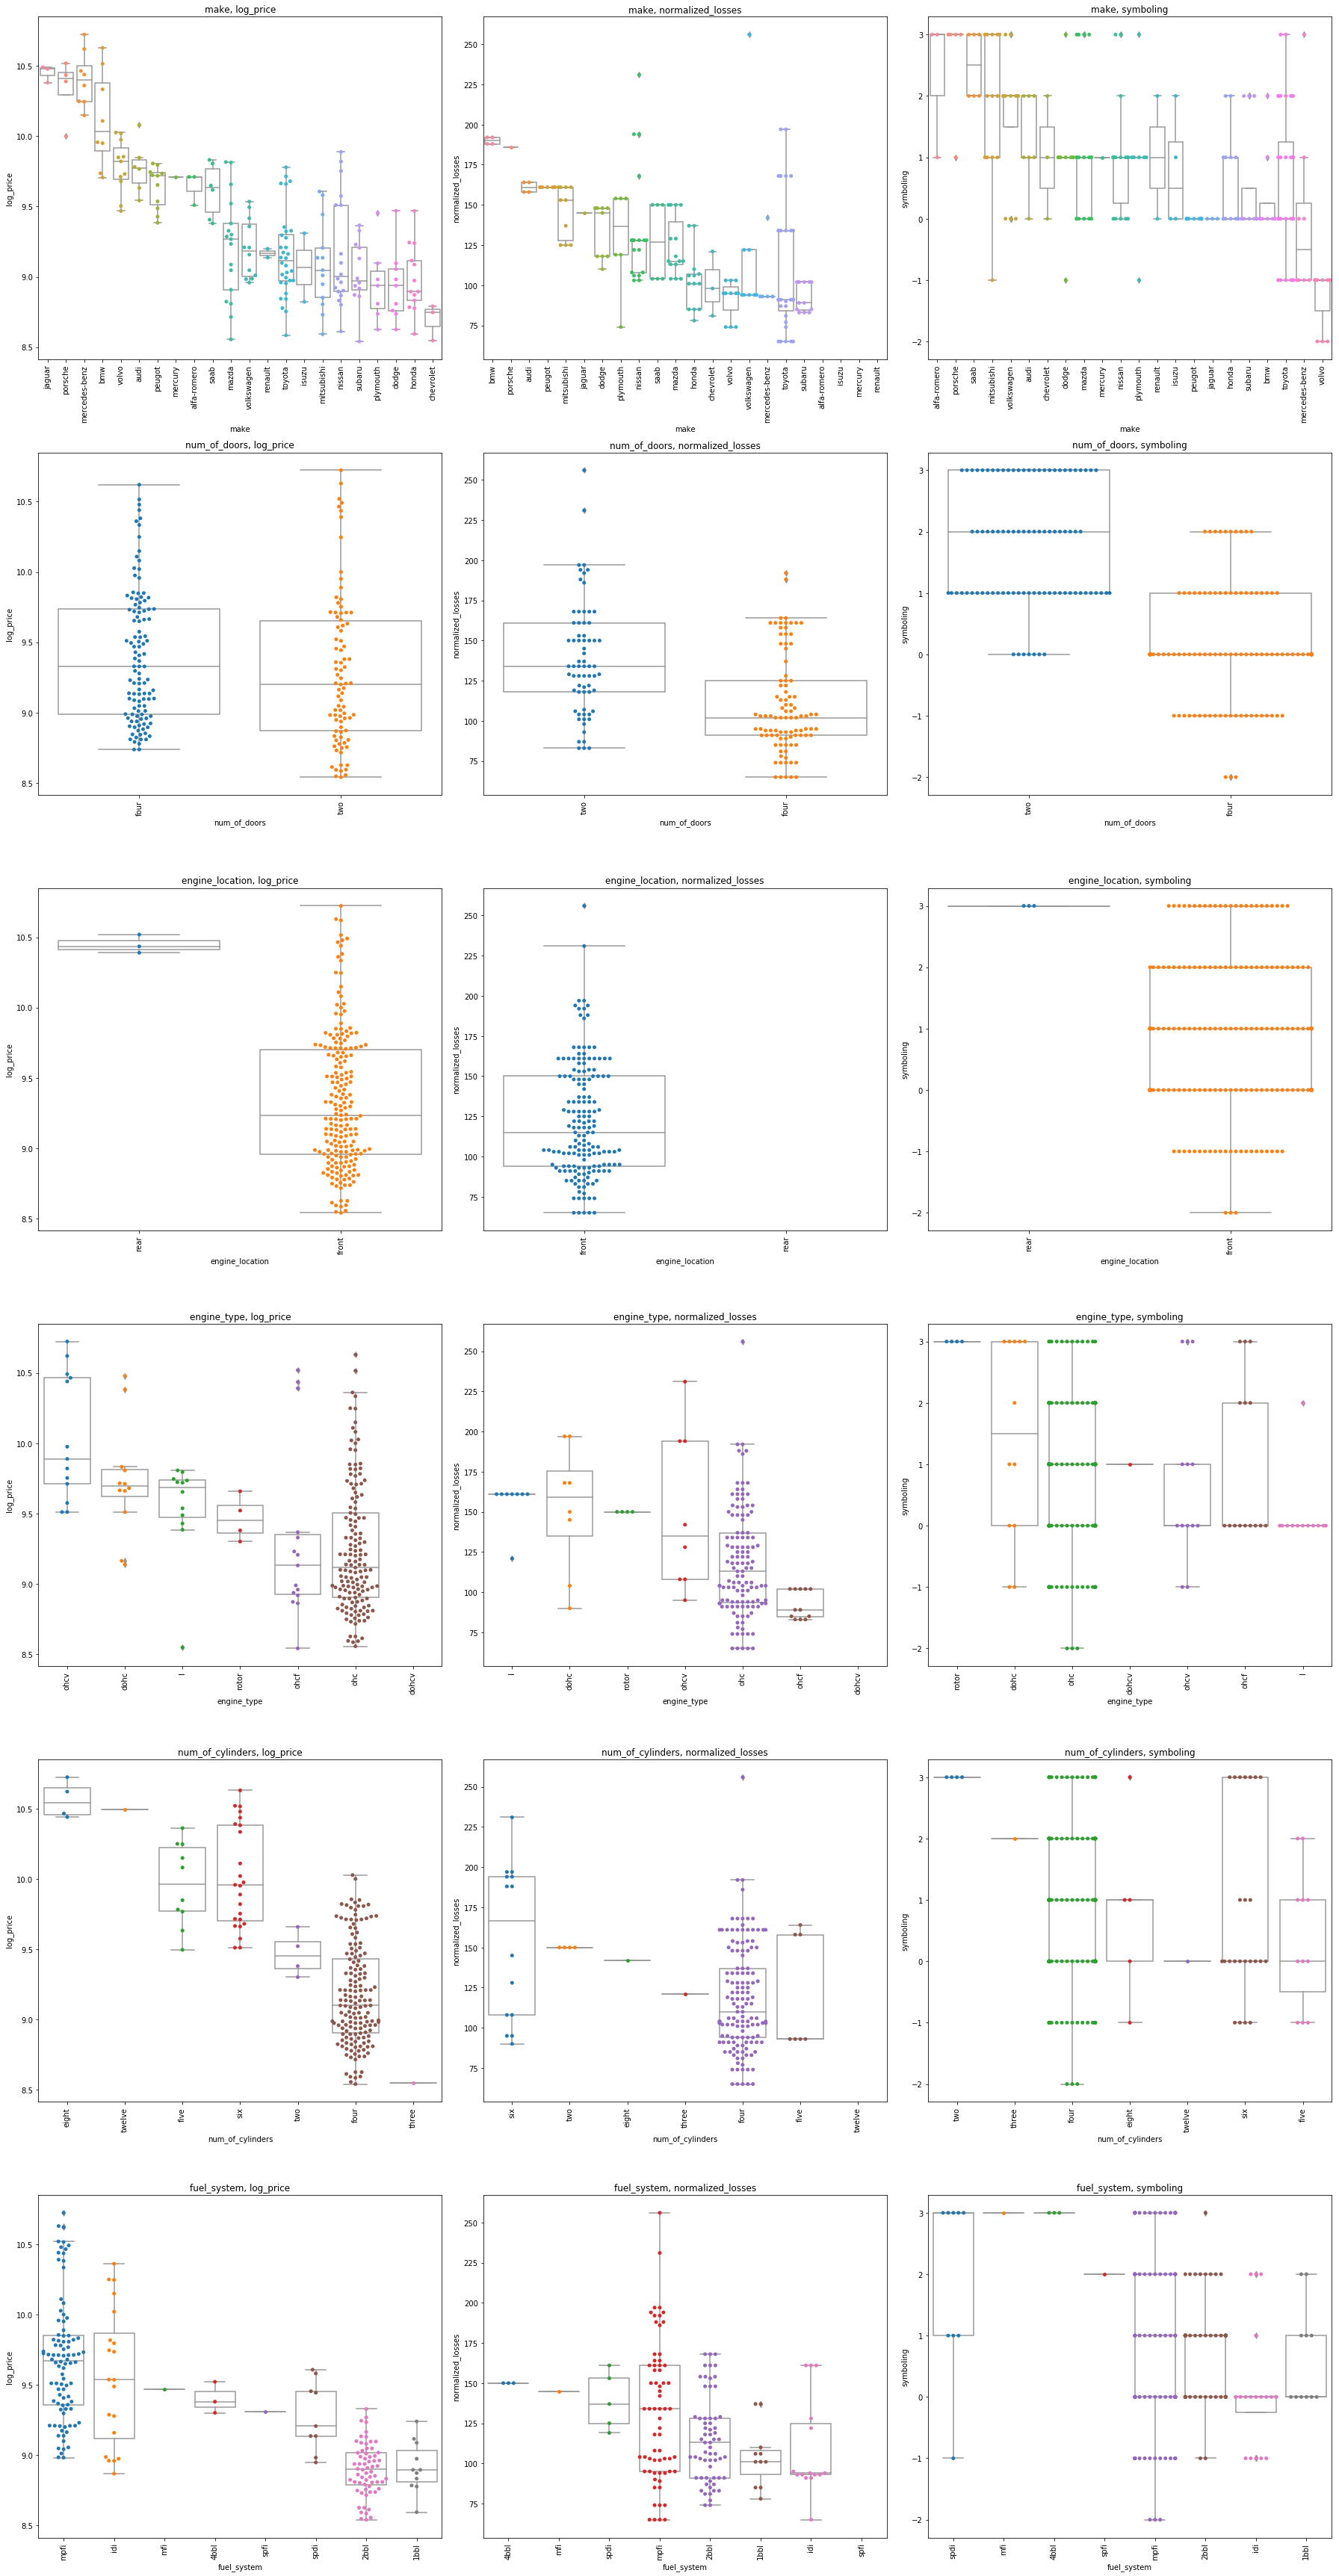

In [9]:
# Go through all the 6 categorical features to see how they relate with
# log_price, normalized_losses, and symboling
display(Markdown('## Categorical Variables\' Boxplots'))
i = 0 # To track which subplot we are on
f = plt.figure(figsize=(25, 8*6))
for x in categorical_columns:
    for y in ['log_price', 'normalized_losses', 'symboling']:
        i += 1
        ax = f.add_subplot(6, 3, i)
        ax = sns.boxplot(x=x, y=y, data=df, ax=ax,
                         order=df.groupby(x)[y].median().sort_values(ascending=False).index, color='white')
        ax = sns.swarmplot(x=x, y=y, data=df, ax=ax,
                         order=df.groupby(x)[y].median().sort_values(ascending=False).index)
        plt.xticks(rotation='90')
        plt.title('{}, {}'.format(x, y))
plt.tight_layout()
plt.show()

From the above, we see that there are cases where the normalized_losses is missing information for some of the categories in each feature, with the exception of the number_of_doors.  Also, we recognize that symbolling is actually a categorical variable as well (ordinal, sure, but still, categorical), so let's select the following features for further consideration.

* CONTINUOUS log_price
* CONTINUOUS normalized_losses
* CATEGORICAL symboling
* CONTINUOUS engine_size (technically, it's recorded as integers, but for our purposes, I think it's fine to call it continuous)
* CONTINUOUS height
* CATEGORICAL num_of_doors

# Distribution/ summary statistics
## Distribution -- Check if Normal
We determined log_price is fairly "normal" before.  Let's take a look at the other continuous variables as well to see what they look like.

### Distribution Histograms

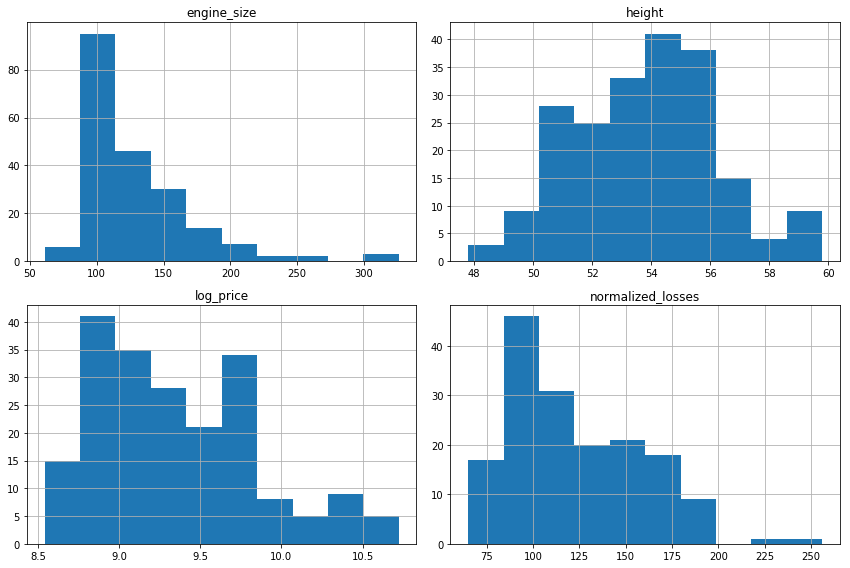

### QQ-plots

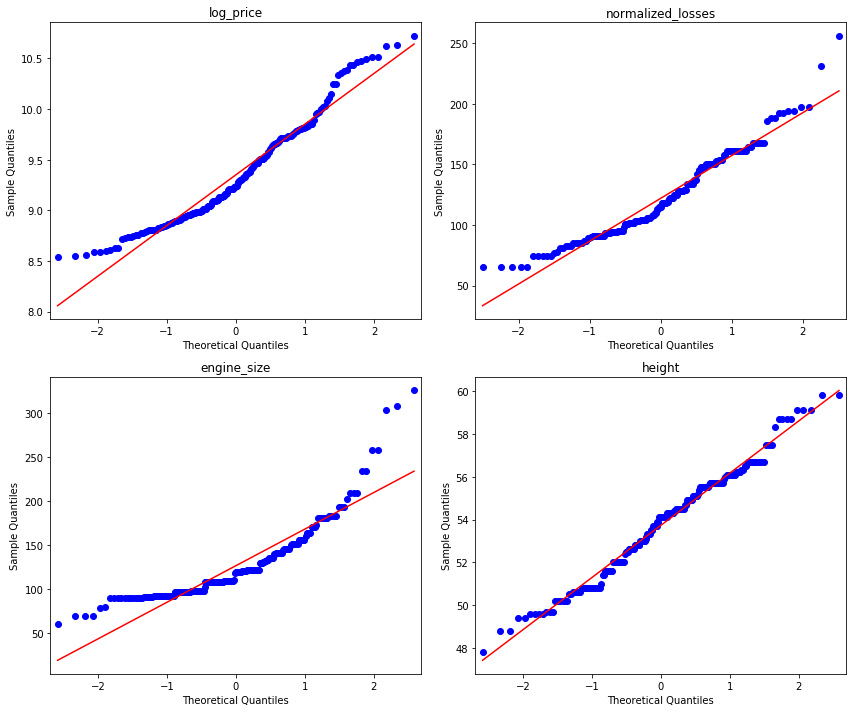

In [10]:
# First, define the variables we will look at
continuous_vars = ['log_price', 'normalized_losses', 'engine_size', 'height']
categorical_vars = ['symboling', 'num_of_doors']

# Now, for the continuous variables, look at their distributions
display(Markdown('### Distribution Histograms'))
df[continuous_vars].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Also, plot a Q-Q plot of these variables
f = plt.figure(figsize=(12,10))
i = 0 # For counting which subplot we are on

# Go through all the continuous variables, and make plots
display(Markdown('### QQ-plots'))
for var in continuous_vars:
    i += 1
    ax = f.add_subplot(2, 2, i)
    sm.qqplot(df[var].dropna(), line='s', ax=ax)
    ax.set_title(var)
    
# Now, re-adjust spacings, and show the plot
f.tight_layout()
plt.show()

From the above, height looks quite normal (even more so than log_price!), while normalized losses also looks fairly normal, except for the two outlier points at the end.  Engine size is really not normal, so let's try log-transforming it (like we had for price).

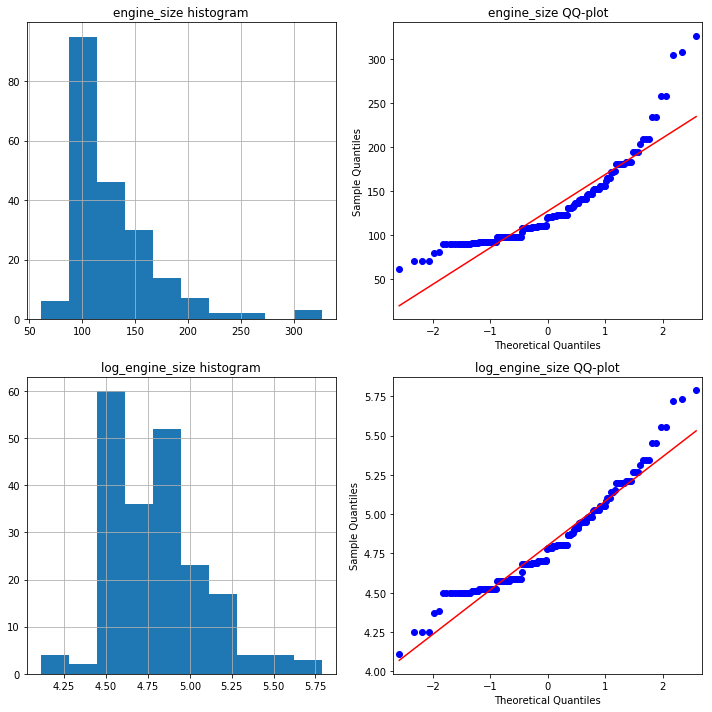

In [11]:
# Log transform engine_size, and let's look at the distribution again.
df['log_engine_size'] = np.log(df.engine_size)

# Now, look at the histogram and QQ plot for both the original engine_size, and the transformed version
f = plt.figure(figsize=(10,10))
i = 0
for var in ['engine_size', 'log_engine_size']:
    i += 1
    ax = f.add_subplot(2, 2, i)
    df[var].hist(ax=ax)
    ax.set_title(var + ' histogram')
    i += 1
    ax = f.add_subplot(2, 2, i)
    sm.qqplot(df[var].dropna(), line='s', ax=ax)
    ax.set_title(var + ' QQ-plot')
    
plt.tight_layout()
plt.show()

Although the transformed engine_size (log_engine_size) looks more normal, it still doesn't look the best, so let's do a Kolmogorov-Smirnov test to compare these distributions (and the other continuous variable distributions) with the normal, to see if we can call them as such (and if not normal, we will have to decide what to do next).

### KS-test

In [12]:
# Do KS-test for all continuous variables to check for normality
ks_results = {'variable': [], 'ks_statistic': [], 'ks_p_val': []}
for var in (continuous_vars + ['log_engine_size', 'price']):
    ks_results['variable'].append(var)
    
    # Before doing a test, need to scale the variable
    scale = preprocessing.StandardScaler().fit(df[var].dropna().to_frame())
    transformed_var = scale.transform(df[var].dropna().to_frame())
    transformed_var = transformed_var.T[0]
    
    # Below code for plots since I was originally getting really weird
    # results.  Fixed it by doing transformed_var.T[0] above
#     f = plt.figure(figsize=(10,5))
#     ax = f.add_subplot(121)
#     ax.hist(transformed_var)
#     plt.title(var)
#     ax = f.add_subplot(122)
#     sm.qqplot(transformed_var, line='s', ax=ax)
#     plt.show()
    
    temp = stats.kstest(transformed_var, 'norm')
    ks_results['ks_statistic'].append(temp[0])
    ks_results['ks_p_val'].append(temp[1])
    
# Convert results to df, then show
ks_results = pd.DataFrame(ks_results)
# Set column order
ks_results = ks_results[['variable', 'ks_statistic', 'ks_p_val']]
ks_results

,variable,ks_statistic,ks_p_val
0,log_price,0.097819,0.039846
1,normalized_losses,0.119784,0.016541
2,engine_size,0.181165,0.000002
3,height,0.075159,0.187595
4,log_engine_size,0.128724,0.002020
5,price,0.154276,0.000121


I did the KS test differently above than when I did it for assignment 4 (where I drew a random sample from the normal distribution with the same mean/ std as the data, while here, I standardized the data instead and compared it with the theoretical standard normal distribution).  As a result, we see that log_price is actually still significantly different from the normal distribution at the $\alpha = 0.05$ level (but, is defintely more "normal" than the original price column).  So, we'll use the $\alpha = 0.01$ significance level to determine if things are normal or not, and we see that log_price, normalized_losses, and height are drawn from the normal distribution (if it was good enough for assignment 4, we'll call it good enough for here too).

However, we see that even with a log transform, engine_size remains non-normal.  Just based on the shape, it kinds of looks like a Poisson distribution, so let's see if that helps any

In [13]:
# Check if this distribution might match a poisson with the same mean
# as the data, shifted to the same place as the minimum value
stats.kstest(df.engine_size, lambda k: stats.poisson.cdf(k,
                                       mu=df.engine_size.mean(),
                                       loc=df.engine_size.min()))

KstestResult(statistic=0.8469056397071899, pvalue=0.0)

Sadly, we see that the data isn't matching a poisson distribution either.  **Since we don't have the time to investigate this further, let's just move on with just `log_price`, `normalized_losses`, and `height` as our continuous variables.**  Now, let's take a look at the summary statistics of these continuous variables.

## Summary Statistics
The key parameters for normal data are the mean and standard deviation, so let's calculate those.

### Classical

In [14]:
# First, update continuous vars to drop the engine size
continuous_vars = [x for x in continuous_vars if x != 'engine_size']

# Now, calculate the mean and std of these variables
classical_summary_stats = {'var': [], 'mean_ss': [], 'std_ss': []}
for var in continuous_vars:
    classical_summary_stats['var'].append(var)
    classical_summary_stats['mean_ss'].append(df[var].mean())
    classical_summary_stats['std_ss'].append(df[var].std())
    
# make into a dataframe, and show
classical_summary_stats = pd.DataFrame(classical_summary_stats)
classical_summary_stats = classical_summary_stats[['var', 'mean_ss', 'std_ss']]
classical_summary_stats

,var,mean_ss,std_ss
0,log_price,9.350115,0.502251
1,normalized_losses,122.000000,35.442168
2,height,53.724878,2.443522


### Bootstrap
Now, let's use bootstrap to see if we can get the same summary statistics from the data

In [15]:
# Let's use bootstrap to calculate the mean
n_samples = 1000

bootstrap_summary_stat_results = pd.DataFrame()
for var in continuous_vars:
    # Sample the data the number of times we want (so we have the same distribution that
    # we're calculating the mean/ std from, although this, strictly speaking, isn't necessary)
    temp_sample = [df[var].sample(frac=1, replace=True) for i in range(n_samples)]
    
    # Now, calculate the summary statistics for these samples
    bootstrap_summary_stat_results[var + '_mean'] = pd.Series([x.mean() for x in temp_sample])
    bootstrap_summary_stat_results[var + '_std'] = pd.Series([x.std() for x in temp_sample])
    
# Now that we have the re-sampled data summary statistics, let's take a look at it:
bootstrap_summary_stat_results.head()

,log_price_mean,log_price_std,normalized_losses_mean,normalized_losses_std,height_mean,height_std
0,9.361348,0.490907,123.397590,33.412188,53.614634,2.384895
1,9.411284,0.521944,126.141176,36.663237,53.834146,2.387222
2,9.305860,0.488792,125.206897,36.352207,53.938537,2.435930
3,9.317210,0.524013,126.683616,36.304918,53.591220,2.451894
4,9.380232,0.499321,123.201220,34.540308,53.732195,2.634265


In [16]:
# These summary statistics should have a normal distribution, (so have equal "outliers"
# above and below the true mean), so let's find the mean of these bootstrapped means,
# and compare with our previous
bootstrap_summary_stats = {'var': [], 'mean_ss': [], 'std_ss': []}
for var in continuous_vars:
    bootstrap_summary_stats['var'].append(var)
    bootstrap_summary_stats['mean_ss'].append(bootstrap_summary_stat_results[var + '_mean'].mean())
    bootstrap_summary_stats['std_ss'].append(bootstrap_summary_stat_results[var + '_std'].mean())
    
# make into a dataframe, and show
bootstrap_summary_stats = pd.DataFrame(bootstrap_summary_stats)
bootstrap_summary_stats = bootstrap_summary_stats[['var', 'mean_ss', 'std_ss']]
print('Bootstrapped Summary Statistics')
display(bootstrap_summary_stats)
print('Classical Summary Statistics')
classical_summary_stats

Bootstrapped Summary Statistics


,var,mean_ss,std_ss
0,log_price,9.350129,0.499957
1,normalized_losses,121.984410,35.310424
2,height,53.723958,2.438261


Classical Summary Statistics


,var,mean_ss,std_ss
0,log_price,9.350115,0.502251
1,normalized_losses,122.000000,35.442168
2,height,53.724878,2.443522


We see that the bootstrap values are quite similar to the classical values.  If we had cacluclated this with more samples, this would have converged even more.

### Bayesian
Let's try to calculate these summary statistics using a Bayesian approach.  Here, we have 2 parameters for the model, so we'll need to define priors and likelihoods for this 2-D space.

Since we don't really have much intuition for what the log_price, normalized_losses, and heights should be, let's just use a uniform prior spanning the entire range of min-max of the feature.

References for calculating the Bayesian Probabilities, discussed [here](https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348), and [for the likelihood](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1), as well as the class "lab" notes.

In [17]:
# Function to define prior's probability distribution (works for
# both mean or std, if we allow possible mean to range within
# the min to max values of the data, or the std to go from
# 0 < std <= (max-min))
def prior(var):
    """
    var {str} -- name of feature we wish to construct a prior for
    """
    
    # Find the min/ max of the feature
    min_val, max_val = df[var].min(), df[var].max()
    
    # Now, return the probability for anything in this range
    return 1./(max_val - min_val)

From the lab notes, we have that the likelihood is $\propto exp \bigg( -\frac{n(\bar{x} - \mu)^2}{2 \sigma^2} \bigg)$.  So, let's make a function that calculates this for a given set of $\mu$ and $\sigma$'s.

In [18]:
# Now, let's define the likelihood which, given a potential mean/
# std, will calculate how likely it would have been to get all of the data points
def gaussian_likelihood(col, mu, sigma, df=df):
    """
    col {str} -- name of feature we would like to calculate the likelihood on
    mu {np.array of float} -- given possible means
    sigma {np.array of float} -- given possible standard deviations
    df {pd.DataFrame} -- uses the specified dataframe (default, the original df)
    
    Returns the probability density of oberving the data, if we had the given mu/ sigma.
    """
    
    # Get some of the terms that will be the same for all mu/sigma
    x_bar = df[col].mean()
    n = df[col].dropna().shape[0]
    
    # Initialize the parameter space
    mu_s, sigma_s = np.meshgrid(mu, sigma)
    
    # Calculate the un-normalized likelihood
    l = np.exp(-n * np.square((x_bar - mu_s)/sigma_s)/2)
    
    """
    Tried to do the full version from the lab notes, but found wasn't
    working very well. Then went to:
    https://www.statlect.com/fundamentals-of-statistics/normal-distribution-Bayesian-estimation
    and saw that things are actually really complicated for Bayesian Inference if you
    are trying to figure out both the mean and the stdev.
    l = (np.power((2*np.pi *np.square(sigma_s)), n/2.) *
         np.exp(-n * np.square((x_bar - mu_s)/sigma_s)/2) *
         np.exp(-1 * np.square(df[col].dropna().values - x_bar).sum()/(2*np.square(sigma_s)))
        )
    """
    
    # Return the normalzied likelihood
    return l / l.sum()

In [19]:
# Define a function to generate the posterior distribution. Will
# calculate for a 1,000 x 1,000 grid, where the limits of the
# search space are the min/max values of the data for that column
def posterior(col):
    """
    col {str} -- the column name to calculate the posterior over
    
    Returns a 1,000 x 1,000 pd.DataFrame of the posterior likelihoods
    """
    
    # First, grab the min/ max values of the data
    min_val, max_val = df[col].min(), df[col].max()
    
    # Now, create the search space for the mean/ std's
    mu_s = np.linspace(min_val, max_val, num=1000)
    # Want to go from 0 to the range, but don't wan't zero (since
    # can't divide by zero), so instead, create 1001 numbers, and
    # take the last 1000
    sigma_s = np.linspace(0, (max_val - min_val), num=1001)[1:]
    
    # Calculate the non-normalized posterior distribution
    post = gaussian_likelihood(col, mu_s, sigma_s) * prior(col) * prior(col)
    #post = gaussian_likelihood(col, mu_s, sigma_s) * stats.norm.pdf(mu_s, loc=df[col].mean(), scale=df[col].std())
    # tried a gaussian prior above (commented out), but find it
    # doesn't change my estimate
    
    # Normalize the distribution
    post = post / post.sum()
    
    # Convert the posterior into a pd.DataFrame, with
    # index and columns the parameter values
    #post = pd.DataFrame(post, index=mu_s, columns=sigma_s)
    post = pd.DataFrame(post, index=sigma_s, columns=mu_s)
    
    # Add names to the index and column series'
    #post.columns = post.columns.rename('sigma')
    #post.index = post.index.rename('mu')
    post.columns = post.columns.rename('mu')
    post.index = post.index.rename('sigma')
    
    # Make a heatmap of the posterior distribution
    # Since we want pretty x/y tick lables, let's create
    # temporary copy of posterior, and round the lables
    post_copy = post.copy()
    post_copy.columns = post_copy.columns.values.round(3)
    post_copy.index = post_copy.index.values.round(3)
    f = plt.figure(figsize=(11,10))
    ax = f.add_subplot(111)
    ax = sns.heatmap(post_copy, ax=ax)
    
    # Add axis labels
    #plt.xlabel('sigma')
    #plt.ylabel('mu')
    plt.xlabel('mu')
    plt.ylabel('sigma')

    plt.title('{} posterior distribution'.format(col))
    
    # And show the plot
    plt.show()
    
    # Also, print the "optimum" mu/ sigma for posterior estimate
    display(post.loc[(post == post.max().max()).any(axis=1),
                     (post == post.max().max()).any(axis=0)])
    
    # Return the normalized posterior distribution
    return post

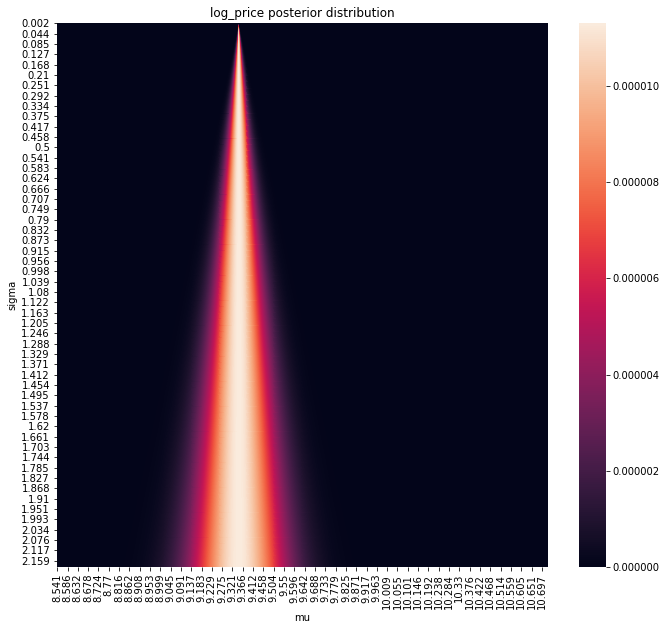

mu,9.351129271246162
sigma,
2.182748,0.000011


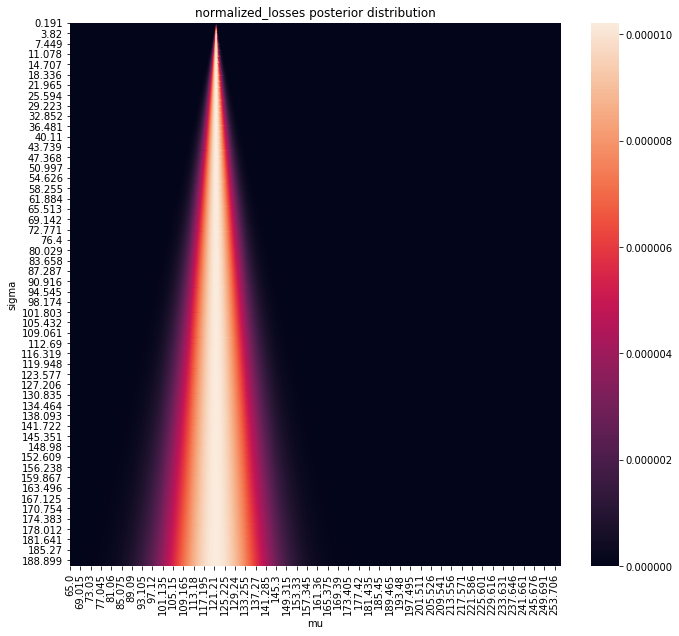

mu,121.97497497497497
sigma,
191.0,0.00001


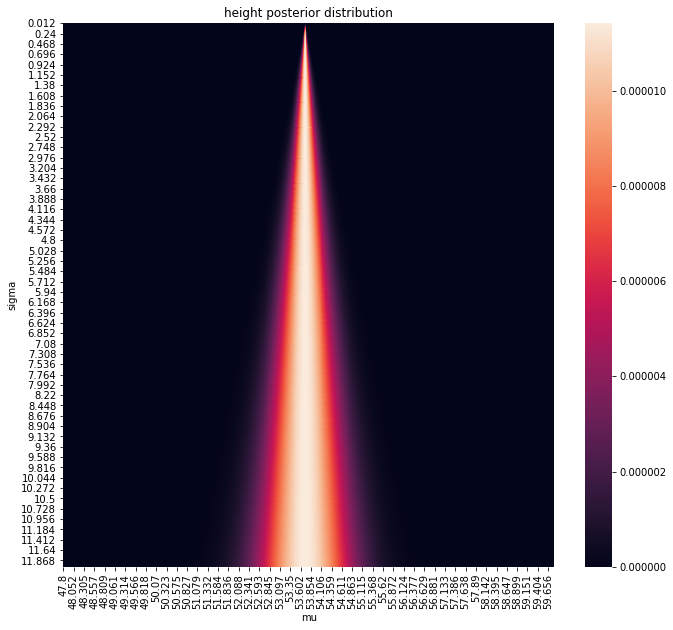

mu,53.72192192192192
sigma,
12.0,0.000011


Bayesian Summary Statistics


,var,mean_ss,std_ss
0,log_price,9.351129,2.182748
1,normalized_losses,121.974975,191.000000
2,height,53.721922,12.000000


Classical Summary Statistics


,var,mean_ss,std_ss
0,log_price,9.350115,0.502251
1,normalized_losses,122.000000,35.442168
2,height,53.724878,2.443522


In [20]:
# Now, for the continuous variables, make parameter estimates
# First, set up to capture the results
bayesian_inference_results = {'var': [], 'mean_ss': [], 'std_ss': []}
bayesian_posteriors = {}

# Then go through all the variables we want to make estimates for
for col in continuous_vars:
    temp = posterior(col)
    
    # Store the posterior distribution for this feature
    bayesian_posteriors[col] = temp
    
    # Grab the maximum probability region
    temp2 = temp.loc[(temp == temp.max().max()).any(axis=1),
                     (temp == temp.max().max()).any(axis=0)]
    
    # Now, store the variable tested, and the values
    bayesian_inference_results['var'].append(col)
    bayesian_inference_results['mean_ss'].append(temp2.columns.values[0])
    bayesian_inference_results['std_ss'].append(temp2.index.values[0])
    
# Now that we are done, make the results into a dataframe and display it
bayesian_inference_results = pd.DataFrame(bayesian_inference_results)
bayesian_inference_results = bayesian_inference_results[['var', 'mean_ss', 'std_ss']]

# Print our estimates, as well as the classical estimates
print('Bayesian Summary Statistics')
display(bayesian_inference_results)
print('Classical Summary Statistics')
classical_summary_stats

We clearly see that the Bayesian estimates for the means are not too far off (within ~0.1 of the classical values), but the standard deviation estimates are not at all close. [This website](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-Bayesian-estimation) derives the likelihood/ posterior distributions for both the mean and variance (assuming both are unkown), and it is much more complicated than we covered in class, so I will just leave the standard deviation estimates as they are, recognizing that they are quite off ...

# Confidence Intervals
Now, let's try to estimate confidence intervals for the above summary statistics.

## Classical

For a derivation of the "classical" confidence interval for the standard deviation, I went to [this website](https://faculty.elgin.edu/dkernler/statistics/ch09/9-3.html).  From there, it gives:

$$
\frac{(n-1)s^2}{\chi^{2}_{1-\alpha/2}} < \sigma^2 < \frac{(n-1)s^2}{\chi^{2}_{\alpha/2}}
$$

(also, note, they define alpha differently than we do, so I'v corrected that).

In [21]:
# First, let's specify the significance level we are interested in
alpha = 0.05

# Set variable to store results
classical_CI = {'var': [], 'mean_CI_low': [], 'mean_CI_high': [], 'mean_ss': [],
                'std_CI_low': [], 'std_CI_high': [], 'std_ss': []}

# Now, for each of our variables
for var in continuous_vars:
    # First, grab the calculated summary statistics from the results
    temp = classical_summary_stats[classical_summary_stats['var'] == var]
    
    # Grab the estimate of the mean, and the std err
    mu = temp.mean_ss
    sigma = temp.std_ss / np.sqrt(df[var].dropna().shape[0])
    
    # Now, calculate the half_width width of the normal distribution, given the
    # mean/stderr estimates from above
    half_width = stats.norm.ppf(1-alpha/2, loc=mu, scale=sigma) - mu
    
    # Now, calculate the lower and upper bounds of the CI
    ci_min, ci_max = (mu - half_width), (mu + half_width)
    
    # Now, store the results
    classical_CI['var'].append(var)
    classical_CI['mean_CI_low'].append(ci_min.values[0])
    classical_CI['mean_CI_high'].append(ci_max.values[0])
    classical_CI['mean_ss'].append(mu.values[0])
    
    # Now, work on the std confidence intervals. First, calculate
    # the numerator of the confidence interval equation
    n = df[var].dropna().shape[0]
    numerator = (n -1) * (temp.std_ss**2)
    
    # and now, the confidence intervals
    ci_min = np.sqrt(numerator / stats.chi2.ppf((1 - (alpha/2)), n-1))
    ci_max = np.sqrt(numerator / stats.chi2.ppf(alpha/2, n-1))
    
    # Now, store the results
    classical_CI['std_CI_low'].append(ci_min.values[0])
    classical_CI['std_CI_high'].append(ci_max.values[0])
    classical_CI['std_ss'].append(temp.std_ss.values[0])
    
# Now convert to dataframe, and show results
classical_CI = pd.DataFrame(classical_CI)
classical_CI = classical_CI[['var', 'mean_CI_low', 'mean_ss', 'mean_CI_high',
                             'std_CI_low', 'std_ss', 'std_CI_high']]
classical_CI

,var,mean_CI_low,mean_ss,mean_CI_high,std_CI_low,std_ss,std_CI_high
0,log_price,9.280681,9.350115,9.419549,0.457484,0.502251,0.556808
1,normalized_losses,116.575666,122.000000,127.424334,31.976854,35.442168,39.756472
2,height,53.390385,53.724878,54.059371,2.227672,2.443522,2.706052


## Bootstrap

In [22]:
# The confidence interval from Bootstrapped samples are
# those which contain 95% of the Bootstrap sample estimates
# (for the alpha = 0.05 level)
# First, define alpha
alpha = 0.05

# Calculate the confidence intervals
ci_low = bootstrap_summary_stat_results.apply(lambda x: np.percentile(x, (alpha * 100/2.)))
ci_high = bootstrap_summary_stat_results.apply(lambda x: np.percentile(x, 100*(1 - alpha/2.)))

# Name the intervals
ci_low.rename('ci_low', inplace=True)
ci_high.rename('ci_high', inplace=True)

# Now, make this into a dataframe, and show
bootstrap_CI = pd.DataFrame([ci_low, ci_high])
print("Bootstrap CIs")
display(bootstrap_CI.T)
print("Classical CIs")
classical_CI

Bootstrap CIs


,ci_low,ci_high
log_price_mean,9.284740,9.419780
log_price_std,0.452136,0.544990
normalized_losses_mean,116.611707,127.732183
normalized_losses_std,31.032035,39.477160
height_mean,53.382878,54.065402
height_std,2.238190,2.638262


Classical CIs


,var,mean_CI_low,mean_ss,mean_CI_high,std_CI_low,std_ss,std_CI_high
0,log_price,9.280681,9.350115,9.419549,0.457484,0.502251,0.556808
1,normalized_losses,116.575666,122.000000,127.424334,31.976854,35.442168,39.756472
2,height,53.390385,53.724878,54.059371,2.227672,2.443522,2.706052


We see that the confidence intervals between Bootstrap and the classical methods are approximately the same, and we can even get confidence intervals for the standard deviation easily! (no need to work with chi-squared distributions).

## Bayesian
Let's now try to tackle finding the "Confidence Interval" (more correctly, the "credible interval") usin Bayesian techniques. As we discussed before, we will only try to do this on the mean, since we don't have time to try to investigate how to make correct estimates of the standard deviation using Bayesian methods (so, we will assume the standard deviation is known and is the same as our sample standard deviation).

In [23]:
# Let's re-write our posterior to caclulate values based off of
# the std of the sample, instead of trying to infer it simultaneously.
def posterior(col, alpha=0.05):
    """
    col {str} -- the column name to calculate the posterior over
    alpha {float} -- the alpha level to set for the credible interval
    
    Returns a 1000x1 pd.DataFrame of the posterior likelihoods, index=Mu's,
        column = probability
    """
    
    # First, grab the min/ max values of the data
    min_val, max_val = df[col].min(), df[col].max()
    
    # Now, create the search space for the mean
    mu_s = np.linspace(min_val, max_val, num=1000)
    
    # For the standard deviation, just use the value from the data
    sigma_s = [df[col].std()]
    
    # Calculate the non-normalized posterior distribution
    post = gaussian_likelihood(col, mu_s, sigma_s) * prior(col) * prior(col)
    
    # Normalize the distribution
    post = post / post.sum()
    
    # Convert the posterior into a pd.DataFrame, with
    # Index being the different mu's, and the column being called
    # the probability
    post = pd.DataFrame(post, columns=mu_s).T
    
    # Add names to the index and column series
    post.index = post.index.rename('mu')
    post.columns = ['probability']
    
    # Now, find the Credible intervals. First, find the
    # cumulative probability from the posterior
    temp = post.cumsum()
    
    # Now, find the credible interval lower bound as that where the
    # cumulative probability is <= alpha/2
    ci_lower = temp[temp.probability <= (alpha / 2)].iloc[-1].name
    ci_upper = temp[temp.probability >= (1 - (alpha / 2))].iloc[0].name
    
    # Make a lineplot of the posterior distribution    
    f = plt.figure(figsize=(11,5))
    ax = f.add_subplot(111)
    ax = ax.plot(post)
    
    # Show the credible intervals
    plt.axvline(x=ci_lower, color='red')
    plt.axvline(x=ci_upper, color='red')
    
    # Add axis labels
    plt.xlabel('mu')
    plt.ylabel('probability')

    plt.title('{} posterior distribution'.format(col))
    
    # And show the plot
    plt.show()
    
    # Return the normalized posterior distribution, and the credible interval bounds
    return post, ci_lower, ci_upper

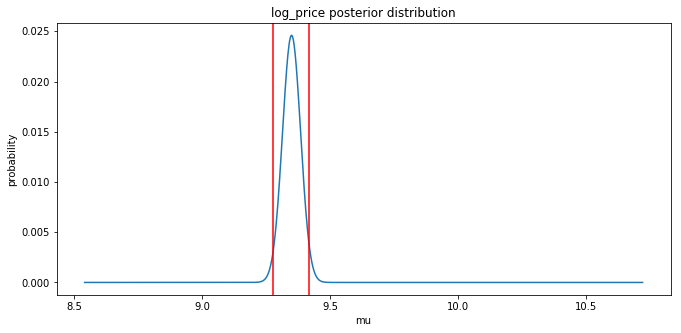

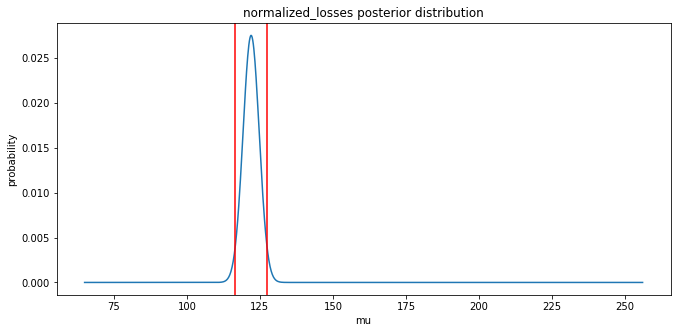

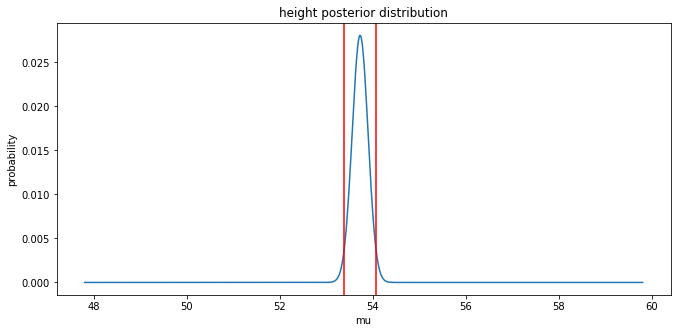

### Bayesian Credible Intervals

,var,ci_low,ci_high
0,log_price,9.279026,9.418862
1,normalized_losses,116.430430,127.328328
2,height,53.373574,54.058258


### Classical Confidence Intervals

,var,mean_CI_low,mean_ss,mean_CI_high,std_CI_low,std_ss,std_CI_high
0,log_price,9.280681,9.350115,9.419549,0.457484,0.502251,0.556808
1,normalized_losses,116.575666,122.000000,127.424334,31.976854,35.442168,39.756472
2,height,53.390385,53.724878,54.059371,2.227672,2.443522,2.706052


In [24]:
# Now, run through the columns to store the bayesian credible intervals
bayesian_CI = {'var': [], 'ci_low':[], 'ci_high': []}

for var in continuous_vars:
    temp = posterior(var)
    
    bayesian_CI['var'].append(var)
    bayesian_CI['ci_low'].append(temp[1])
    bayesian_CI['ci_high'].append(temp[2])
    
# Now that we've run through all of them, convert to dataframe
bayesian_CI = pd.DataFrame(bayesian_CI)
bayesian_CI = bayesian_CI[['var', 'ci_low', 'ci_high']]

# Now, print the credible intervals, and
# compare with the classical confidence intervals
display(Markdown('### Bayesian Credible Intervals'))
display(bayesian_CI)
display(Markdown('### Classical Confidence Intervals'))
classical_CI

Considering how the Bayesian credible intervals were generated using a completely different metric, I'd say these look quite close (within 3 significant digits, about).

Now, let's move on to statistical tests, to see if we can find a difference between.

# Hypothesis Tests
As a reminder, we had for our categorical variables:

* num_of_doors (either 'four' or 'two')
* symboling (potential values of -3, -2, -1, 0, 1, 2, 3, but in reality, didn't have any -3's or many -2's)

So, let's do t-tests to see if each of our continuous variables (log_price, normalized_losses, and height) are significantly different for the num_of_doors pair, and do ANOVA and Tukey's HSD for symboling.

## Check on value_counts
First, a check on value_counts for each of the variables for num_of_doors or symobling, just to make sure we have enough data for each test.

In [25]:
# Check the value_counts for num_of_doors and symboling
df[categorical_vars].apply(pd.Series.value_counts)

/home/koman/miniconda3/envs/dsc/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,symboling,num_of_doors
0,67.0,NaN
1,54.0,NaN
2,32.0,NaN
3,27.0,NaN
-1,22.0,NaN
-2,3.0,NaN
four,NaN,114.0
two,NaN,89.0


So, it looks like we have plenty of counts for num_of_doors, and plenty for all values of symbolling, except -3 doesn't show up (as we mentioned before), and -2 only has 3 counts, so shouldn't be used.

## Classical
Compare if there is a significant difference in the means of our continuous variables between vehicles with two or four doors (do two-sided test, to see if the values are different).  Then, check if there is a difference between the values for symboling, 

In [26]:
# Check difference between two/four doors for the continous variables
classical_ttest = {'var': [], 't_stat': [], 'p_val': [], 'two_door_n': [],
                   'four_door_n': [], 'two_door_mean': [], 'four_door_mean': [],
                   'two_door_std': [], 'four_door_std': []}

# Define the dataframes for two and four door cars
two_door = df[df.num_of_doors == 'two']
four_door = df[df.num_of_doors == 'four']

# Now, go through all our continuous variables
for var in continuous_vars:
    
    # store the variable
    classical_ttest['var'].append(var)
    
    # Drop nulls from our data for this column (otherwise,
    # test fails to give anything interesting)
    test_two_door = two_door[var].dropna()
    test_four_door = four_door[var].dropna()
    
    # Store how many datapoints we have
    classical_ttest['two_door_n'].append(test_two_door.shape[0])
    classical_ttest['four_door_n'].append(test_four_door.shape[0])
    
    # And other summary statistics
    classical_ttest['two_door_mean'].append(test_two_door.mean())
    classical_ttest['four_door_mean'].append(test_four_door.mean())
    classical_ttest['two_door_std'].append(test_two_door.std())
    classical_ttest['four_door_std'].append(test_four_door.std())
    
    # Perform the t-test (need to drop nulls for this to work)
    test = stats.ttest_ind(test_two_door, test_four_door, equal_var=False)
    
    # Now store the t-statistic and the p-value
    classical_ttest['t_stat'].append(test[0])
    classical_ttest['p_val'].append(test[1])
    
# Convert to a df and display
classical_ttest = pd.DataFrame(classical_ttest)
# Reorder columns
classical_ttest = classical_ttest[['var', 'two_door_n', 'four_door_n',
                                   'two_door_mean', 'four_door_mean',
                                   'two_door_std', 'four_door_std',
                                   't_stat', 'p_val']]
display(Markdown('### t-test comparing 2 vs 4 door vehicles'))

classical_ttest

### t-test comparing 2 vs 4 door vehicles

,var,two_door_n,four_door_n,two_door_mean,four_door_mean,two_door_std,four_door_std,t_stat,p_val
0,log_price,86,113,9.292991,9.396764,0.543929,0.469474,-1.413379,1.593968e-01
1,normalized_losses,68,95,138.867647,109.652632,35.320243,30.363321,5.516155,1.788005e-07
2,height,89,114,52.221348,54.910526,1.996387,2.088628,-9.331577,2.524277e-17


We see that although log_price is not significantly different for two vs four door cars, normalized_losses and height are, with two door cars having a higher normalized loss, and normalized cars being slightly shorter.  Perhaps two-door cars tend to be more of the "sporty" type cars, and as a result, cost more (which would make sense for why their normalized losses would be heigher).  Also, such "sporty" cars would also in general be shorter, as they tend to be closer to the ground for stability.

### ANOVA

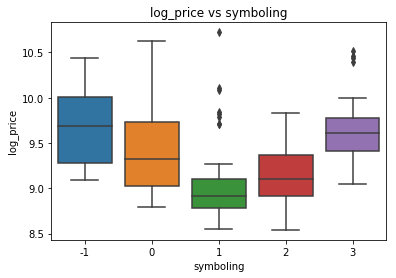

F_onewayResult(statistic=14.466043950551216, pvalue=2.382511521746864e-10)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  -1     0    -0.2346  -0.5381  0.069  False 
  -1     1    -0.6246  -0.9376 -0.3116  True 
  -1     2    -0.5159  -0.8567  -0.175  True 
  -1     3     0.0008  -0.3526  0.3543 False 
  0      1    -0.3901  -0.6191 -0.1611  True 
  0      2    -0.2813  -0.5471 -0.0155  True 
  0      3     0.2354  -0.0464  0.5172 False 
  1      2     0.1088  -0.1677  0.3853 False 
  1      3     0.6255   0.3336  0.9174  True 
  2      3     0.5167   0.1951  0.8383  True 
---------------------------------------------


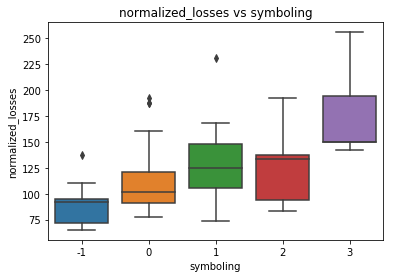

F_onewayResult(statistic=20.267809081880912, pvalue=1.8417630807030256e-13)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  -1     0    27.5667   6.0373  49.0961   True 
  -1     1    42.9745  21.3778  64.5711   True 
  -1     2    40.0897  16.5772  63.6021   True 
  -1     3    83.0471  56.3616  109.7325  True 
  0      1    15.4078  -1.1921  32.0077  False 
  0      2     12.523  -6.5026  31.5486  False 
  0      3    55.4804  32.6494  78.3114   True 
  1      2    -2.8848  -21.9865 16.2169  False 
  1      3    40.0726  17.1782   62.967   True 
  2      3    42.9574  18.2476  67.6672   True 
-----------------------------------------------


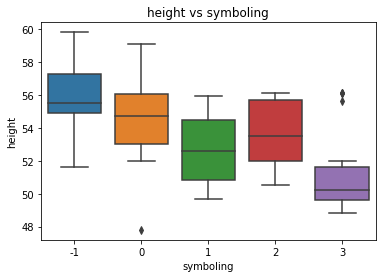

F_onewayResult(statistic=25.37458780493044, pvalue=5.765974844489825e-17)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  -1     0    -1.1254  -2.4816  0.2307 False 
  -1     1    -3.0916  -4.4875 -1.6957  True 
  -1     2    -2.3827  -3.9112 -0.8542  True 
  -1     3    -4.7823  -6.3674 -3.1972  True 
  0      1    -1.9661  -2.9754 -0.9568  True 
  0      2    -1.2572  -2.4432 -0.0713  True 
  0      3    -3.6569  -4.9149 -2.3988  True 
  1      2     0.7089  -0.5223  1.9401 False 
  1      3    -1.6907  -2.9916 -0.3899  True 
  2      3    -2.3997  -3.8419 -0.9574  True 
---------------------------------------------


,var,F_stat,p_val,-1_cnts,0_cnts,1_cnts,2_cnts,3_cnts,-1_means,0_means,1_means,2_means,3_means,-1_stds,0_stds,1_stds,2_stds,3_stds
0,log_price,14.466044,2.382512e-10,22,65,52,32,27,9.669784,9.435231,9.045137,9.153916,9.670617,0.434726,0.500602,0.448461,0.369061,0.395135
1,normalized_losses,20.267809,1.841763e-13,20,48,47,29,17,85.600000,113.166667,128.574468,125.689655,168.647059,18.528499,32.510773,28.478630,30.167513,30.636867
2,height,25.374588,5.765975e-17,22,67,54,32,27,55.904545,54.779104,52.812963,53.521875,51.122222,1.995108,2.096645,1.755213,1.988959,2.252577


In [27]:
# Set up our anova results storage
classical_anova = {'var': [], 'F_stat': [], 'p_val': []}

temp_stats = {'var': [], 'symboling': [], 'val_cnts': [],
              'val_means': [], 'val_stds': []}

display(Markdown('### ANOVA'))

# Now, let's go through the continuous variables and do ANOVA on them
# based off of the levels of symboling
for var in continuous_vars:
    
    # First, make pivoted dataframe of the values from var,
    # for pivoting on each of the levels (other than -2)
    # in symboling
    pivoted = df[~df.symboling.isin([-3, -2])].pivot(columns='symboling', values=var)
    
    # Let's plot these, while we're at it, so we can see what the distributions
    # look like
    sns.boxplot(x='symboling', y=var, data=df[~df.symboling.isin([-3, -2])])
    plt.title('{} vs symboling'.format(var))
    plt.show()
    
    # Now, do the anova test, grabbing values for each of the columns,
    # and dropping any NA's (again, the test can't handle them)
    results = stats.f_oneway(*[pivoted[col].dropna() for col in pivoted.columns])

    # Store the stats for this variable
    for symbol in pivoted.columns:
        temp_stats['var'].append(var)
        temp_stats['symboling'].append(str(symbol))
        temp_stats['val_cnts'].append(pivoted[symbol].dropna().shape[0])
        temp_stats['val_means'].append(pivoted[symbol].mean())
        temp_stats['val_stds'].append(pivoted[symbol].std())
    
    # Now, store our results
    classical_anova['var'].append(var)
    classical_anova['F_stat'].append(results[0])
    classical_anova['p_val'].append(results[1])
    
    # Print the test results
    print(results)
    
    # Also, while we're here, let's do Tukey's HSD, although we
    # technically shouldn't look at these unless we've already found
    # we have at least one column significantly different ...
    # (but, it's easier to just code it here, while we're at it)
    data = [pivoted[col].dropna().values for col in pivoted.columns]
    data = [y for x in data for y in x]
    groups = [str(x) for x in pivoted.columns for y in pivoted[x].dropna()]
    print(sm.stats.multicomp.pairwise_tukeyhsd(data,
        groups))
    
# Now that we're done with the loop, make each into a DF
temp_stats = pd.DataFrame(temp_stats)

# pivot the temp_stats, so we have columns for each of the 
classical_anova = pd.DataFrame(classical_anova)

# For each of the statistics, let's add them to our anova table
for col in ['cnts', 'means', 'stds']:
    
    # Create the column name
    col_name = 'val_{}'.format(col)
    
    classical_anova = pd.merge(classical_anova,
                               temp_stats[['var', 'symboling', col_name]]\
                                   .pivot(index='var', columns='symboling', values=col_name)\
                                   .reset_index(),
                              on='var', how='left', suffixes=('', '_{}'.format(col)))

# Some re-naming that we need to do
classical_anova.rename(columns={x: x + '_cnts' for x in '-1 0 1 2 3'.split()}, inplace=True)
# And finally, re-ordering the columns
cols = ['var', 'F_stat', 'p_val']
cols = cols + [x for x in classical_anova.columns if x not in cols]
classical_anova = classical_anova[cols]
classical_anova

We see that there are indeed at least one symbol column that has different values for each of the continuous variables we tested.  Also, looking at Tukey's HSD, height segregates the groups the best (which, actually should have been expected, since in our [clustered correlation heatmap](#clustered_cor_heatmap) showed height to be the most correlated with symboling.

Also, we read from the data description that a symbol of +3 indicated the riskiest vehicles, which aligns well with normalized losses going up as symboling rises, and the height of the vehicles going down as the symboling rises (again, if the shorter cars tend to be the sporty cars, these would likely cost more to fix, would be more risky, and would also be shorter).

Interestingly, if we look at log_price vs symboling, we see the most expensive cars being at both symbol extremes, with the price first falling as the symbol increases, and then it rises back up as the symbol continues to rise.  This also makes sense, as some of the most expensive vehicles are likely luxury cars, which have additional safety features and are built well, and so even though they may cost more, are likely to be less risky.  As we decrease the price, cars tend to enter the more mass-market versions (with less features), and so become riskier.  Finally, the last group (as the symboling continues to rise) are those that are becoming more and more the "sporty" kind, and so are once again increasing in price.

## Bootstrap
Now, let's see if we can replicate our findings for significance in differences between the continuous variables stratified by the number of doors the vehicle has, using the Bootstrap method (not sure how to use Bootstrap for ANOVA, so we'll forgo that).

To test for a difference in two means (under assumptions of normality), we calculate the original t-statistic (not assuming equal variance), then calculate a bootstrapped distribution of t-statistics under the null hypothesis (removing whatever difference in means there might be).  We then calculate a p-value by finding the fraction of times this null hypothesis t-statistic is >= the t-statistic calculated from the data.

In [28]:
# Set the number of re-samples
n_samples = 10000

# Set up variables to store the null distribution t-values,
# and the results
bootstrap_null_t_vals = pd.DataFrame()
bootstrap_ttest = {'var': [], 't_stat': [], 'p_val': []}

for var in continuous_vars:
    
    # First, let's grab the data split by the number of doors
    df_by_door = {x: df.loc[df.num_of_doors == x, var].dropna()
                  for x in ['two', 'four']}
    
    # calculate the original t-statistic
    t_data = ((df_by_door['two'].mean() - df_by_door['four'].mean()) /
              np.sqrt((df_by_door['two'].var()/df_by_door['two'].shape[0]) +
                      (df_by_door['four'].var()/df_by_door['four'].shape[0])))
    
    # Now, take the data, and remove the mean's from the data for each
    # stratification (to construct data under the null hypothesis)
    df_by_door['two'] = df_by_door['two'] - df_by_door['two'].mean() + df[var].mean()
    df_by_door['four'] = df_by_door['four'] - df_by_door['four'].mean() + df[var].mean()

    
    # Now, sample the data the number of times we want, for each door count
    # to generate the distribution of t-values.
    sampled_df = {x: [df_by_door[x].sample(frac=1, replace=True) for i in range(n_samples)]
                   for x in ['two', 'four']}
    
    # Calculate the t-distribution
    t_dist = [
        (sampled_df['two'][i].mean() - sampled_df['four'][i].mean()) /
        np.sqrt((sampled_df['two'][i].var()/sampled_df['two'][i].shape[0]) +
                (sampled_df['four'][i].var()/sampled_df['four'][i].shape[0]))
        for i in range(n_samples)]
    
    # Let's store this t-distribution
    bootstrap_null_t_vals[var] = t_dist
    
    # Now, calculate the fraction of times the the t-statistic from the data was
    # <= the t_values from the null distribution, and store
    bootstrap_ttest['var'].append(var)
    bootstrap_ttest['t_stat'].append(t_data)
    bootstrap_ttest['p_val'].append(
        (bootstrap_null_t_vals[var].abs() >= abs(t_data)).sum() /
        float(n_samples))
    
    
# Convert results to df
bootstrap_ttest = pd.DataFrame(bootstrap_ttest)
bootstrap_ttest = bootstrap_ttest[['var', 't_stat', 'p_val']]
print("Bootstrap Values")
display(bootstrap_ttest)
print("Classical Values")
classical_ttest

Bootstrap Values


,var,t_stat,p_val
0,log_price,-1.413379,0.1606
1,normalized_losses,5.516155,0.0000
2,height,-9.331577,0.0000


Classical Values


,var,two_door_n,four_door_n,two_door_mean,four_door_mean,two_door_std,four_door_std,t_stat,p_val
0,log_price,86,113,9.292991,9.396764,0.543929,0.469474,-1.413379,1.593968e-01
1,normalized_losses,68,95,138.867647,109.652632,35.320243,30.363321,5.516155,1.788005e-07
2,height,89,114,52.221348,54.910526,1.996387,2.088628,-9.331577,2.524277e-17


We see that the bootstrapped version of the p-values replicates the classical methods fairly well, with normalized_losses and height being significantly different with the number of doors, but not log_price.

## Bayesian
Try seeing if we find a significant difference between cars with two vs four doors, for each of the continuous variables (not sure how we would use Bayesian methods for ANOVA, so will not try).

For the equivalent of a "t-test", just check if the two credible intervals overlap -- if not, then they are significantly different.  If they do overlap, then they are not significantly different.

In [29]:
# Let's re-write our posterior to caclulate values based off of
# the std of the sample, instead of trying to infer it simultaneously.
def posterior(col, alpha=0.05):
    """
    col {str} -- the column name to calculate the posterior over
    alpha {float} -- the alpha level to set for the credible interval
    
    Returns a 1000x1 pd.DataFrame of the posterior likelihoods, index=Mu's,
        column = probability
    """
    
    # First, split the data based on the number of doors
    # it has
    df_by_door = {x: df.loc[df.num_of_doors == x, col].dropna()
                  for x in ['two', 'four']}
    
    # Initialize variables
    min_val, max_val = {}, {} # min/max values of the data
    mu_s = {} # the search space of possible mu's
    sigma_s = {} # The standard deviation of the distributions
    post = {} # The posterior distribution
    ci_lower, ci_upper = {}, {} # the credible intervals
    color = {'two': 'red', 'four': 'green'} # The colors for the plots
    
    # Initialize a plot for the posterior distributions
    f = plt.figure(figsize=(11,5))
    ax = f.add_subplot(111)
    
    # Go through for each number of doors
    for door in ['two', 'four']:
        # Grab the min/ max values of the data
        min_val[door], max_val[door] = df_by_door[door].min(), df_by_door[door].max()
    
        # Create the search space for the mean
        mu_s[door] = np.linspace(min_val[door], max_val[door], num=1000)
    
        # For the standard deviation, just use the value from the data
        sigma_s[door] = [df_by_door[door].std()]
    
        # Calculate the non-normalized posterior distribution
        post[door] = gaussian_likelihood(col, mu_s[door], sigma_s[door], df_by_door[door].to_frame()) * prior(col) * prior(col)
    
        # Normalize the distribution
        post[door] = post[door] / post[door].sum()
    
        # Convert the posterior into a pd.DataFrame, with
        # Index being the different mu's, and the column being called
        # the probability
        post[door] = pd.DataFrame(post[door], columns=mu_s[door]).T
    
        # Add names to the index and column series
        post[door].index = post[door].index.rename('mu')
        post[door].columns = ['probability']
    
        # Now, find the Credible intervals. First, find the
        # cumulative probability from the posterior
        temp = post[door].cumsum()
    
        # Now, find the credible interval lower bound as that where the
        # cumulative probability is <= alpha/2
        ci_lower[door] = temp[temp.probability <= (alpha / 2)].iloc[-1].name
        ci_upper[door] = temp[temp.probability >= (1 - (alpha / 2))].iloc[0].name
    
        # Plot the posterior distribution
        ax.plot(post[door], label=door)
    
        # Show the credible intervals
        ax.axvline(x=ci_lower[door], color=color[door])
        ax.axvline(x=ci_upper[door], color=color[door])
    
    # Now that we finished calculating the posterior probabilities,
    # add axis labels, title, and legend
    plt.xlabel('mu')
    plt.ylabel('probability')
    plt.title('{} posterior distributions'.format(col))
    plt.legend()
    
    # And show the plot
    plt.show()
    
    # Return the normalized posterior distribution, and the credible interval bounds
    return post, ci_lower, ci_upper

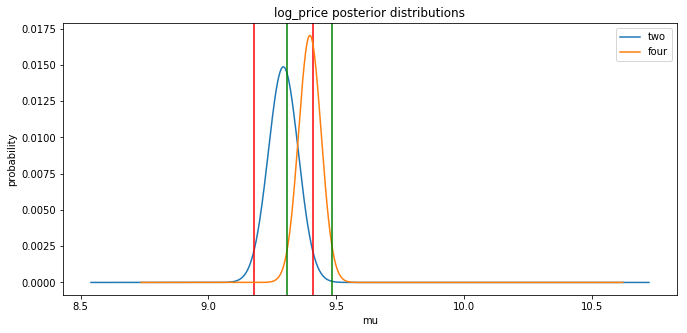

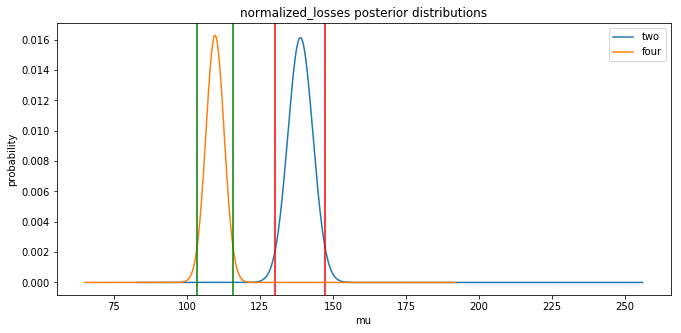

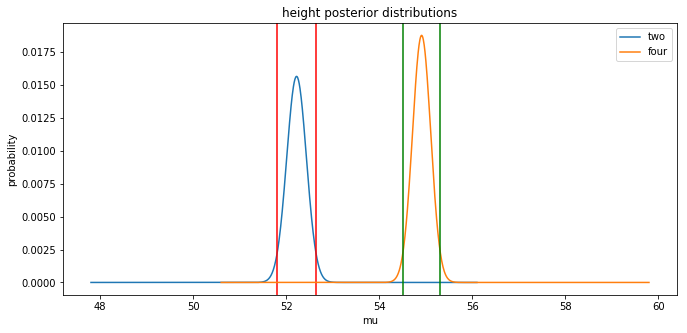

In [30]:
# Now, let's go through the continuous variables, and see if their credible intervals
# will overlap for the number of doors the vehicles have
for var in continuous_vars:
    posterior(var)

From the above plots, we see once again that log_price is not significantly different for vehicles with two or four doors, but normalized_losses and height are.  Height is the most significantly differnent, because we can see the two distributions are a larger number of credible intervals apart from one another.  All of this is consistent with the classical values of these tests, shown once again, below:

In [31]:
classical_ttest

,var,two_door_n,four_door_n,two_door_mean,four_door_mean,two_door_std,four_door_std,t_stat,p_val
0,log_price,86,113,9.292991,9.396764,0.543929,0.469474,-1.413379,1.593968e-01
1,normalized_losses,68,95,138.867647,109.652632,35.320243,30.363321,5.516155,1.788005e-07
2,height,89,114,52.221348,54.910526,1.996387,2.088628,-9.331577,2.524277e-17


# Summary
In this analysis, we examined the automobile data set once again.  We first examined the different features, then picked:
* CONTINUOUS log_price
* CONTINUOUS normalized_losses
* CONTINUOUS height
* CATEGORICAL num_of_doors
* CATEGORICAL symboling

as variables to consider for additional investigation.  These were chosen in part for their inherent buisness interest (how much cars will cost to replace, how much certain types of cars are costing the company, and the "riskiness" score), as well as for how they seemed to segregate/correlate with the data (height correlates well with symboling and normalized_losses), and how complete they were (num_of_doors seemed to have almost no missing values).

The continuous variables were then investigated to ensure they fit a normal distribution fairly well, then the mean and standard deviation of the variables were determined using classical, bootstrap, and bayesian methods (except for standard deviation for bayesian methods, as we didn't have the time to keep investigating how to go about doing this).  Confidence/ credible intervals for these summary statistics were then determined as well, showing the range of values that the true mean and standard deviations may fall under.

Finally, statistical tests were performed on the continuous variables, both segregated by the number of doors, and by the various symbolling values.  It was determined that there are likely sports cars (with only two doors, and which also are shorter than other cars) in the dataset which not only cost the company more (as determined via normalized losses), but have also been determined previously to be more risky (as indicated with higher symboling values).  However, due to luxury cars that also cost more (but have additional safety features, and which are likely driven by people who are more careful with their driving), it was determined that the number of doors doesn't segregate the log price as well.

These trends were also seen when simultaneously comparing the log_price, normalized_losses, and height of the various symboling levels, where we see that the most expensive cars are those with both the lowest and highest symboling values, while symboling is correlated with normalized losses, and anti-correlated with height.

## Future directions
We can further validate the hypothesis that there are some sports cars in this data set, by comparing how the two-door cars that are more expensive correlate with engine size, aspiration, or other such features that would distinguish sports cars from other vehicles.